<a href="https://colab.research.google.com/github/Zelechos/IA_Code/blob/master/SegundoParcial%20IA/Ejercicio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo 1
## La referencias usada para realizar este model es
[Repsitorio sis421](https://github.com/cwpachecol/SIS421)

In [ ]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp37-none-any.whl size=9675 sha256=1eef8ee69196f7e1f6c42a5bb20edcdf34fe1d1a47ce0259b1e555c17b9583ed
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [ ]:
import wget 

wget.download('http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar')

'images.tar'

In [ ]:
import shutil

shutil.unpack_archive("/content/images.tar", "/content")

In [ ]:
import os 
PATH = '/content/test'
os.mkdir(PATH)

In [ ]:
import os 

PATH = '/content/Images'

classes = os.listdir(PATH)
classes[115:]

['n02106166-Border_collie',
 'n02102480-Sussex_spaniel',
 'n02085782-Japanese_spaniel',
 'n02093991-Irish_terrier',
 'n02097130-giant_schnauzer']

In [ ]:
imgs, labels = [], []

for i, lab in enumerate(classes[105:]):
  paths = os.listdir(f'{PATH}/{lab}')
  print(f'Categoría: {lab}. Imágenes: {len(paths)}')
  paths = [p for p in paths if p[-3:] == "jpg"]
  imgs += [f'{PATH}/{lab}/{img}' for img in paths]
  labels += [i]*len(paths)

print(len(imgs))

Categoría: n02105855-Shetland_sheepdog. Imágenes: 157
Categoría: n02112706-Brabancon_griffon. Imágenes: 153
Categoría: n02112137-chow. Imágenes: 196
Categoría: n02091244-Ibizan_hound. Imágenes: 188
Categoría: n02093428-American_Staffordshire_terrier. Imágenes: 164
Categoría: n02100877-Irish_setter. Imágenes: 155
Categoría: n02110806-basenji. Imágenes: 209
Categoría: n02085936-Maltese_dog. Imágenes: 252
Categoría: n02110958-pug. Imágenes: 200
Categoría: n02088238-basset. Imágenes: 175
Categoría: n02096585-Boston_bull. Imágenes: 182
Categoría: n02085620-Chihuahua. Imágenes: 152
Categoría: n02105251-briard. Imágenes: 152
Categoría: n02107683-Bernese_mountain_dog. Imágenes: 218
Categoría: n02098105-soft-coated_wheaten_terrier. Imágenes: 156
Categoría: n02106166-Border_collie. Imágenes: 150
Categoría: n02102480-Sussex_spaniel. Imágenes: 151
Categoría: n02085782-Japanese_spaniel. Imágenes: 185
Categoría: n02093991-Irish_terrier. Imágenes: 169
Categoría: n02097130-giant_schnauzer. Imágenes: 1

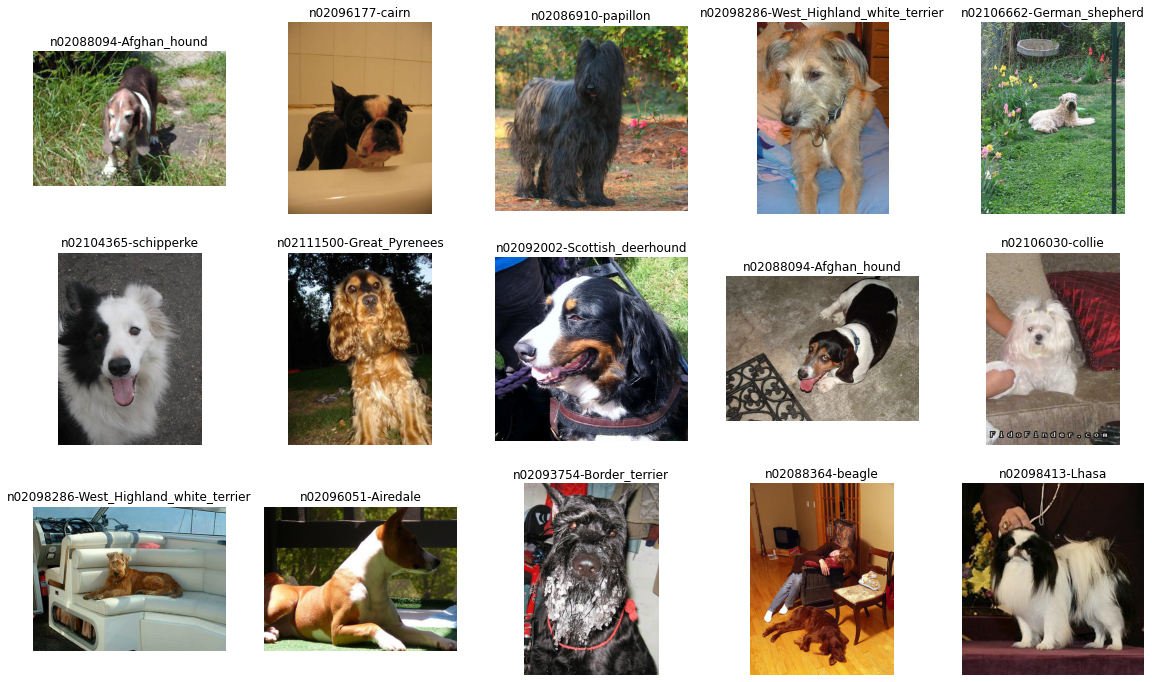

In [ ]:
import random 
from skimage import io
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3,5, figsize=(10*2,6*2))
for _ax in axs:
  for ax in _ax:
    ix = random.randint(0, len(imgs)-1)
    img = io.imread(imgs[ix])
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(classes[labels[ix]])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

train_imgs, test_imgs, train_labels, test_labels = train_test_split(imgs, labels, test_size=0.2, stratify=labels)

len(train_imgs), len(test_imgs)

(2130, 533)

In [ ]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
class Dataset(torch.utils.data.Dataset):
  def __init__(self, X, y, trans, device):
    self.X = X
    self.y = y
    self.trans = trans
    self.device = device

  def __len__(self):
    return len(self.X)

  def __getitem__(self, ix):
    # cargar la imágen
    img = io.imread(self.X[ix])
    # aplicar transformaciones
    if self.trans:
      img = self.trans(image=img)["image"]
    return torch.from_numpy(img / 255.).float().permute(2,0,1), torch.tensor(self.y[ix])

cuda


In [ ]:
import albumentations as A

trans = A.Compose([
    A.Resize(224, 224)
])

dataset = {
    'train': Dataset(train_imgs, train_labels, trans, device), 
    'test': Dataset(test_imgs, test_labels, trans, device)
}

len(dataset['train']), len(dataset['test'])

(2130, 533)

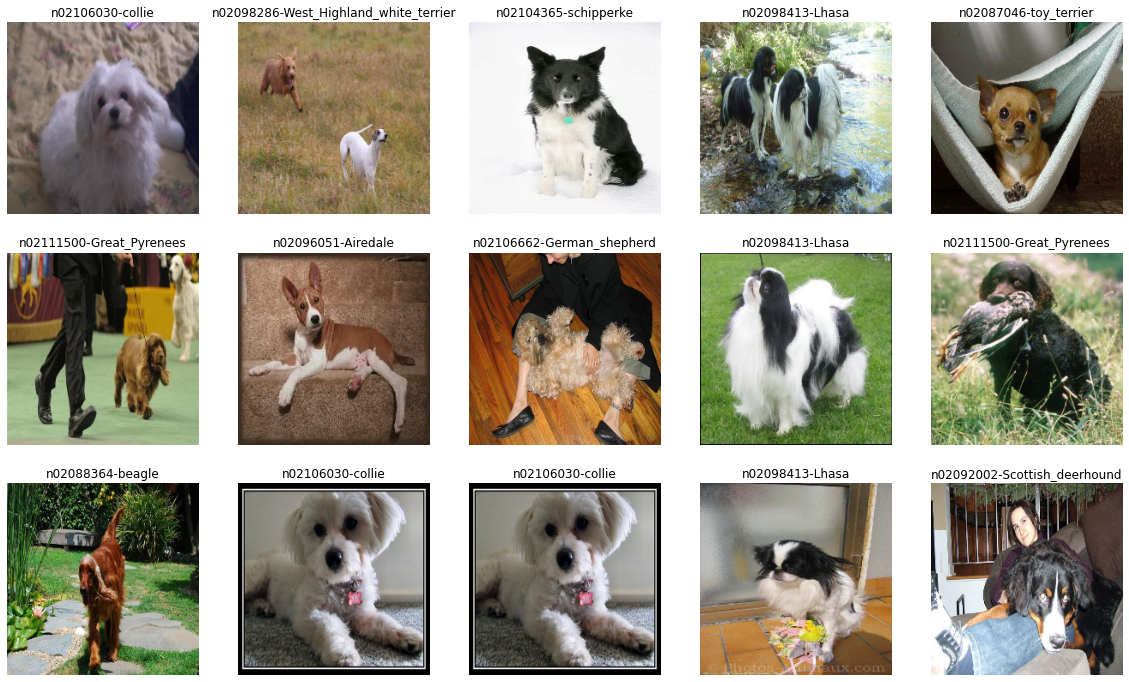

In [ ]:
fig, axs = plt.subplots(3,5, figsize=(10*2,6*2))
for _ax in axs:
  for ax in _ax:
    ix = random.randint(0, len(dataset['train'])-1)
    img, lab = dataset['train'][ix]
    ax.imshow(img.permute(1,2,0))
    ax.axis('off')
    ax.set_title(classes[lab])
plt.show()

In [ ]:
dataloader = {
    'train': torch.utils.data.DataLoader(dataset['train'], batch_size=192, shuffle=True, pin_memory=True), 
    'test': torch.utils.data.DataLoader(dataset['test'], batch_size=256, shuffle=False)
}

imgs, labels = next(iter(dataloader['train']))
imgs.shape

torch.Size([192, 3, 224, 224])

In [ ]:
import torchvision

resnet = torchvision.models.resnet34()
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
class Model(torch.nn.Module):
  def __init__(self, n_outputs=15, pretrained=False, freeze=False):
    super().__init__()
    # descargamos resnet
    resnet = torchvision.models.resnet18(pretrained=pretrained)
    # nos quedamos con todas las capas menos la última
    self.resnet = torch.nn.Sequential(*list(resnet.children())[:-1])
    if freeze:
      for param in self.resnet.parameters():
        param.requires_grad=False
    # añadimos una nueva capa lineal para llevar a cabo la clasificación
    self.fc = torch.nn.Linear(512,15)

  def forward(self, x):
    x = self.resnet(x)
    x = x.view(x.shape[0], -1)
    x = self.fc(x)
    return x

  def unfreeze(self):
    for param in self.resnet.parameters():
        param.requires_grad=True

In [ ]:
model = Model()
outputs = model(torch.randn(192, 3, 224, 224))
outputs.shape

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


torch.Size([192, 15])

In [ ]:
from tqdm import tqdm
import numpy as np

def fit(model, dataloader, epochs=5, lr=1e-2):
    model.to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    criterion = torch.nn.CrossEntropyLoss()
    for epoch in range(1, epochs+1):
        model.train()
        train_loss, train_acc = [], []
        bar = tqdm(dataloader['train'])
        for batch in bar:
            X, y = batch
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            y_hat = model(X)
            loss = criterion(y_hat, y)
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())
            acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
            train_acc.append(acc)
            bar.set_description(f"loss {np.mean(train_loss):.5f} acc {np.mean(train_acc):.5f}")
        bar = tqdm(dataloader['test'])
        val_loss, val_acc = [], []
        model.eval()
        with torch.no_grad():
            for batch in bar:
                X, y = batch
                X, y = X.to(device), y.to(device)
                y_hat = model(X)
                loss = criterion(y_hat, y)
                val_loss.append(loss.item())
                acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
                val_acc.append(acc)
                bar.set_description(f"val_loss {np.mean(val_loss):.5f} val_acc {np.mean(val_acc):.5f}")
        print(f"Epoch {epoch}/{epochs} loss {np.mean(train_loss):.5f} val_loss {np.mean(val_loss):.5f} acc {np.mean(train_acc):.5f} val_acc {np.mean(val_acc):.5f}")

## Entrenamos el Modelo desde Cero

In [ ]:
model = Model()
fit(model, dataloader, epochs=10)

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch 1/10 loss 2.71461 val_loss 2.69480 acc 0.08941 val_acc 0.10466


  0%|          | 0/12 [00:00<?, ?it/s]

Epoch 2/10 loss 2.64845 val_loss 2.72011 acc 0.13079 val_acc 0.12469


  0%|          | 0/12 [00:00<?, ?it/s]

Epoch 3/10 loss 2.60479 val_loss 2.71385 acc 0.16623 val_acc 0.12469


  0%|          | 0/12 [00:00<?, ?it/s]

Epoch 4/10 loss 2.58446 val_loss 2.70133 acc 0.14699 val_acc 0.11818


  0%|          | 0/12 [00:00<?, ?it/s]

Epoch 5/10 loss 2.55245 val_loss 2.62335 acc 0.16479 val_acc 0.15203


  0%|          | 0/12 [00:00<?, ?it/s]

Epoch 6/10 loss 2.52828 val_loss 2.61270 acc 0.16363 val_acc 0.19965


  0%|          | 0/12 [00:00<?, ?it/s]

Epoch 7/10 loss 2.51276 val_loss 2.62422 acc 0.17260 val_acc 0.14943


  0%|          | 0/12 [00:00<?, ?it/s]

Epoch 8/10 loss 2.48680 val_loss 3.14076 acc 0.18851 val_acc 0.07447


  0%|          | 0/12 [00:00<?, ?it/s]

Epoch 9/10 loss 2.44708 val_loss 2.52198 acc 0.19792 val_acc 0.17156


val_loss 2.94744 val_acc 0.08749: 100%|██████████| 3/3 [00:02<00:00,  1.06it/s]

Epoch 10/10 loss 2.40593 val_loss 2.94744 acc 0.22425 val_acc 0.08749


### Traemos nuestro modelo que acabamos de entrenar y aplicamos TRANSFER LEARNING

Ahora vamos a entrenar el mismo caso pero, en este caso, utilizando los pesos pre-entrenados de resnet.

In [ ]:
model = Model(pretrained=True, freeze=True)
fit(model, dataloader)

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch 1/5 loss 2.51023 val_loss 2.27366 acc 0.22381 val_acc 0.33166


  0%|          | 0/12 [00:00<?, ?it/s]

Epoch 2/5 loss 2.01101 val_loss 1.80721 acc 0.51823 val_acc 0.62977


  0%|          | 0/12 [00:00<?, ?it/s]

Epoch 3/5 loss 1.62798 val_loss 1.45471 acc 0.72758 val_acc 0.75161


  0%|          | 0/12 [00:00<?, ?it/s]

Epoch 4/5 loss 1.34243 val_loss 1.22175 acc 0.79514 val_acc 0.83495


val_loss 1.06023 val_acc 0.84146: 100%|██████████| 3/3 [00:02<00:00,  1.06it/s]

Epoch 5/5 loss 1.14581 val_loss 1.06023 acc 0.85402 val_acc 0.84146



# Fine Tuning

Todavía podemos mejorar un poco más si, además de utilizar los pesos descargados de Imagenet en resnet, entrenamos también la red completa.

In [ ]:
model = Model(pretrained=True, freeze=False)
fit(model, dataloader)

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch 1/5 loss 2.41521 val_loss 2.02845 acc 0.29355 val_acc 0.43818


  0%|          | 0/12 [00:00<?, ?it/s]

Epoch 2/5 loss 1.62746 val_loss 1.31338 acc 0.69907 val_acc 0.73574


  0%|          | 0/12 [00:00<?, ?it/s]

Epoch 3/5 loss 1.13617 val_loss 0.91676 acc 0.85851 val_acc 0.87971


  0%|          | 0/12 [00:00<?, ?it/s]

Epoch 4/5 loss 0.84341 val_loss 0.72233 acc 0.90133 val_acc 0.88622


val_loss 0.61275 val_acc 0.90315: 100%|██████████| 3/3 [00:02<00:00,  1.08it/s]

Epoch 5/5 loss 0.66970 val_loss 0.61275 acc 0.91580 val_acc 0.90315


In [ ]:
model = Model(pretrained=True, freeze=True)
fit(model, dataloader)
model.unfreeze()
fit(model, dataloader, lr=1e-4)

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch 1/5 loss 2.58559 val_loss 2.28611 acc 0.18678 val_acc 0.25905


  0%|          | 0/12 [00:00<?, ?it/s]

Epoch 2/5 loss 2.04249 val_loss 1.88585 acc 0.47888 val_acc 0.48555


  0%|          | 0/12 [00:00<?, ?it/s]

Epoch 3/5 loss 1.65651 val_loss 1.49868 acc 0.64916 val_acc 0.64100


  0%|          | 0/12 [00:00<?, ?it/s]

Epoch 4/5 loss 1.39430 val_loss 1.31051 acc 0.74175 val_acc 0.68812


  0%|          | 0/12 [00:00<?, ?it/s]

Epoch 5/5 loss 1.19362 val_loss 1.12273 acc 0.80064 val_acc 0.81386


  0%|          | 0/12 [00:00<?, ?it/s]

Epoch 1/5 loss 1.10369 val_loss 1.12340 acc 0.83825 val_acc 0.80996


  0%|          | 0/12 [00:00<?, ?it/s]

Epoch 2/5 loss 1.08567 val_loss 1.11740 acc 0.84491 val_acc 0.80735


  0%|          | 0/12 [00:00<?, ?it/s]

Epoch 3/5 loss 1.09246 val_loss 1.11683 acc 0.84679 val_acc 0.82192


  0%|          | 0/12 [00:00<?, ?it/s]

Epoch 4/5 loss 1.08137 val_loss 1.10973 acc 0.85561 val_acc 0.82323


val_loss 1.10548 val_acc 0.83234: 100%|██████████| 3/3 [00:02<00:00,  1.07it/s]

Epoch 5/5 loss 1.07047 val_loss 1.10548 acc 0.85446 val_acc 0.83234


In [ ]:
optimizer = torch.optim.Adam([
    {'params': model.resnet.parameters(), 'lr': 1e-4},
    {'params': model.fc.parameters(), 'lr': 1e-3}
])